In [3]:
import numpy as np
import matplotlib.pyplot as plt

stat_exposure = np.loadtxt("./ELM_1226505_2_0Hz_1e6MW_1.0eV_1e-4/results/derived_quantities_exposure.csv", skiprows=1, delimiter=",")
stat_baking = np.loadtxt("./ELM_1226505_2_0Hz_1e6MW_1.0eV_1e-4/results/derived_quantities_baking.csv", skiprows=1, delimiter=",")
ELM_exposure = np.loadtxt("./ELM_1226505_1_50Hz_1e6MW_1.0eV_1e-4/results/derived_quantities_exposure.csv", skiprows=1, delimiter=",")
ELM_baking = np.loadtxt("./ELM_1226505_1_50Hz_1e6MW_1.0eV_1e-4/results/derived_quantities_baking.csv", skiprows=1, delimiter=",")

data_stat = np.vstack((
    np.column_stack((
        stat_exposure[:,0]/3600/24, stat_exposure[:,2], stat_exposure[:,3]
    )),
    np.column_stack((
        (stat_baking[:,0] + stat_exposure[:,0].max())/3600/24, stat_baking[:,2], stat_baking[:,3] 
    )),
))

data_ELM = np.vstack((
    np.column_stack((
        ELM_exposure[:,0]/3600/24, ELM_exposure[:,2], ELM_exposure[:,3] 
    )),
    np.column_stack((
        (ELM_baking[:,0] + ELM_exposure[:,0].max())/3600/24, ELM_baking[:,2], ELM_baking[:,3] 
    )),
))

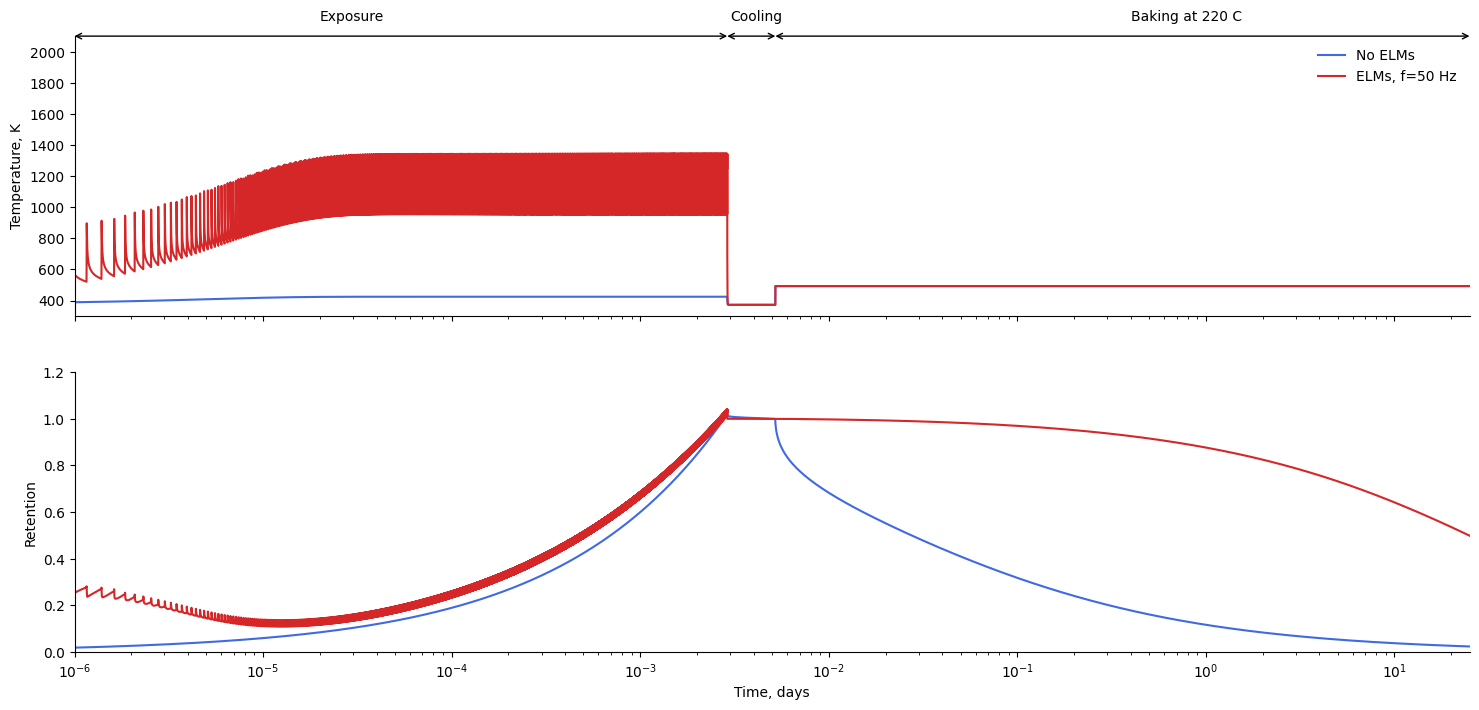

In [16]:
params = {
    "axes.spines.right": False,
    "axes.spines.top": False,
}
plt.rcParams.update(params)

fig, axs = plt.subplots(2, 1, figsize=(18, 8), sharex=True)

axs[0].plot(data_stat[:,0], data_stat[:,1], color="royalblue", label="No ELMs")
axs[0].plot(data_ELM[:,0], data_ELM[:,1], color="tab:red", label="ELMs, f=50 Hz")

axs[1].plot(data_stat[:,0], data_stat[:,2]/stat_baking[:,3].max(), color="royalblue")
axs[1].plot(data_ELM[:,0], data_ELM[:,2]/ELM_baking[:,3].max(), color="tab:red")

axs[0].annotate(
    text = "",
    xy=(1e-6,2100),
    xytext=(250/3600/24, 2100),
    arrowprops = dict(arrowstyle="<->",shrinkA=0,shrinkB=0)
)
axs[0].annotate(
    text = "Exposure",
    xy=(5e-5,2100),
    xytext=(2e-5, 2200),  
)

axs[0].annotate(
    text = "",
    xy=(250/3600/24,2100),
    xytext=(450/3600/24, 2100),
    arrowprops = dict(arrowstyle="<->",shrinkA=0,shrinkB=0)
)
axs[0].annotate(
    text = "Cooling",
    xy=(8e-3,2100),
    xytext=(3e-3, 2200),  
)

axs[0].annotate(
    text = "",
    xy=(450/3600/24,2100),
    xytext=(25, 2100),
    arrowprops = dict(arrowstyle="<->",shrinkA=0,shrinkB=0)
)
axs[0].annotate(
    text = "Baking at 220 C",
    xy=(1e-6,2100),
    xytext=(0.4, 2200),  
)
axs[0].set_ylabel('Temperature, K')
axs[0].set_xscale('log')
axs[0].set_xlim(1e-6, 25)
axs[0].set_ylim(300, 2100)
axs[1].set_ylabel("Retention")
axs[1].set_xlabel("Time, days")
axs[1].set_ylim(0, 1.2)
axs[0].legend(frameon=False)


#plt.savefig('./test.png')
plt.show()
